# Factor Analysis
This notebook aims to perform Factor Analysis on the Flipkart Psychometric and Demographic data.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install -qqq factor_analyzer

     |████████████████████████████████| 41 kB 327 kB/s 


In [3]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Change to your own directory
try:
    os.chdir("/content/drive/MyDrive/BT4211 Data-driven Marketing")
    print("Directory changed")
except OSError:
    print("Error: Can't change the Current Working Directory")

Directory changed


In [5]:
# Load dataset
psycho_demo_num_df = pd.read_csv('Data/psycho_demo_num.csv')

In [6]:
psycho_demo_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 64 columns):
 #   Column                                                                               Non-Null Count  Dtype 
---  ------                                                                               --------------  ----- 
 0   Name                                                                                 303 non-null    object
 1   Gender                                                                               303 non-null    int64 
 2   Marital Status                                                                       303 non-null    int64 
 3   Income (per month)                                                                   303 non-null    int64 
 4   Hobbies Count                                                                        303 non-null    int64 
 5   In most ways, my life is close to my ideal                                           303 non-null  

## Bartlett’s Test of Sphericity
This test checks whether the correlation is present in the given data. It tests the null hypothesis (H0) that the correlation matrix is an Identical matrix. 

In [7]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2, p = calculate_bartlett_sphericity(psycho_demo_num_df.loc[:, psycho_demo_num_df.columns != 'Name'])
print("Chi-squared value:", chi2)
print("p-value:", p)

Chi-squared value: 8037.554483629356
p-value: 0.0


Since the p test statistic is less than 0.05, we can conclude that correlation is present among the variables which is a green signal to apply factor analysis.

In [8]:
psycho_demo_num_df.loc[:, psycho_demo_num_df.columns != 'Name']

,Gender,Marital Status,Income (per month),Hobbies Count,"In most ways, my life is close to my ideal",The conditions in my life are excellent,"So far, I have got the important things I want in my life","If I could live my life over, I would change almost nothing",Many people have directly or indirectly contributed to my progress in life,I feel good when I co-operate with others,...,Exercise Frequency,Preferred Mode of Payment_Cash On Delivery,Preferred Mode of Payment_Credit Card,Preferred Mode of Payment_Debit Card,Preferred Mode of Payment_Net Banking,Preferred Mode of Payment_Online Wallets,Preferred Mode of Payment_UPI,Volunteer Frequency,Hobbies Frequency,Care for Chronic Illness
0,1,0,0,2,5,4,4,4,5,5,...,0,0,0,0,0,0,1,4,2,0
1,1,0,2,4,2,2,3,1,4,5,...,1,0,0,0,0,0,1,1,2,0
2,0,1,3,2,6,6,5,6,7,7,...,1,0,0,0,0,0,1,4,3,0
3,1,0,0,2,5,5,4,6,7,6,...,3,0,0,1,0,0,0,2,2,0
4,1,0,0,1,6,5,6,1,4,5,...,0,0,0,1,0,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,3,1,5,5,6,3,7,7,...,1,0,0,0,0,0,1,3,2,0
299,0,1,1,1,7,7,7,7,3,6,...,2,1,0,0,0,0,0,2,1,0
300,1,0,0,1,4,5,6,2,5,5,...,1,0,0,0,0,0,1,1,3,0
301,0,0,0,2,5,2,5,3,6,7,...,1,0,0,0,0,0,1,2,4,0


## Kaiser-Meyer-Olkin
- Measures the proportion of variance that might be a common variance among the variables
- Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis
- KMO score is always between 0 to 1, prefer values more than 0.6
- A measure of how suited our data is for factor analysis

In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(psycho_demo_num_df.loc[:, psycho_demo_num_df.columns != 'Name'])
print(kmo_model)

0.6655692085424394


/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


## Decide Number of Factors
Number of factors can be decided on the basis of the amount of common variance the factors explain

In [10]:
from factor_analyzer import FactorAnalyzer
dataframe = psycho_demo_num_df.loc[:, psycho_demo_num_df.columns != 'Name']
fa = FactorAnalyzer(rotation=None, impute="drop", n_factors=dataframe.shape[1])
dataframe.shape[1]

63

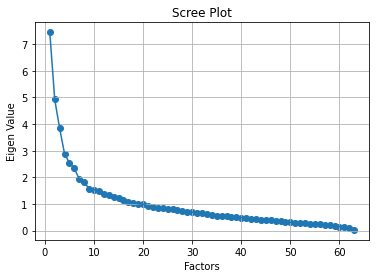

In [11]:
fa.fit(dataframe)
ev, _ = fa.get_eigenvalues()
plt.scatter(range(1, dataframe.shape[1]+1), ev)
plt.plot(range(1, dataframe.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [12]:
# Eigenvalues
ev

array([7.44248858, 4.92572267, 3.84096999, 2.89220464, 2.5332653 ,
       2.33716721, 1.93267507, 1.82515965, 1.57081879, 1.53858419,
       1.47148259, 1.3713562 , 1.33907959, 1.26167017, 1.22457889,
       1.14502847, 1.0786067 , 1.05183699, 1.00532807, 0.99135786,
       0.92859858, 0.89819977, 0.85436015, 0.8340718 , 0.80088871,
       0.79677867, 0.77123025, 0.73594373, 0.70108563, 0.6972743 ,
       0.67222826, 0.64674334, 0.60878847, 0.59031533, 0.56076868,
       0.55407267, 0.53120407, 0.51637944, 0.50786437, 0.48848507,
       0.46319454, 0.45151127, 0.44880586, 0.41633084, 0.40303799,
       0.38521016, 0.37191508, 0.34586869, 0.34191608, 0.31108977,
       0.29327374, 0.28165107, 0.28081399, 0.26180238, 0.24877198,
       0.23344495, 0.2056186 , 0.19738404, 0.16699498, 0.15363295,
       0.13839418, 0.09784507, 0.02682891])

In [13]:
# Factors with eigenvalues above 1
len(ev[ev > 1])

19

19 factors have eigenvalues above 1

## Loadings

In [15]:
fa = FactorAnalyzer(n_factors=19, rotation='varimax')
fa.fit(dataframe)
factors = pd.DataFrame(fa.loadings_, index=dataframe.columns)
factors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Gender,0.113928,-0.112104,-0.008415,-0.060932,0.104020,-0.253582,0.021329,-0.191607,-0.003464,0.089848,0.192530,0.023387,0.006419,-0.122142,0.133453,-0.173231,0.001274,-0.002509,-0.100227
Marital Status,0.014535,-0.055632,0.902925,0.088974,0.012368,0.026781,0.035802,0.027635,0.079258,-0.059897,0.041199,-0.025366,-0.018511,0.079688,0.041306,-0.022649,0.080724,-0.058569,-0.000007
Income (per month),0.103029,0.071368,0.187280,0.130586,-0.001561,0.042917,-0.065223,0.033236,0.137475,0.094956,-0.005967,-0.111747,0.070287,0.135719,0.115864,0.028327,0.481629,-0.206318,0.018487
Hobbies Count,-0.073130,0.033860,-0.103954,-0.029835,-0.006878,0.023922,-0.118703,0.038737,0.027154,0.142614,0.142009,0.011497,0.039327,-0.002744,-0.037385,0.342911,0.060926,0.072495,-0.020944
"In most ways, my life is close to my ideal",0.050790,0.176663,0.083629,0.730099,0.171934,0.049246,0.058934,0.015335,0.053472,-0.035575,0.019128,-0.030018,-0.006311,0.043268,0.005499,-0.042788,0.065614,0.115113,-0.107917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Preferred Mode of Payment_Online Wallets,0.017802,0.045999,-0.022182,0.008679,0.015913,-0.085121,-0.228870,0.211903,0.001453,-0.043770,-0.139653,-0.024249,-0.008947,0.199992,0.029043,-0.085642,0.027775,-0.015120,0.056495
Preferred Mode of Payment_UPI,0.048996,-0.083713,-0.133634,-0.030709,-0.112712,0.008241,0.084185,-0.056273,0.040515,0.758341,0.084864,0.053845,-0.380995,-0.102943,-0.361335,0.135429,-0.111196,0.219236,-0.082769
Volunteer Frequency,0.023817,0.168140,0.137851,0.075950,0.071060,0.149297,0.306008,0.144195,-0.060330,-0.061657,0.179099,-0.028304,-0.052633,0.003615,0.007086,-0.072529,-0.126570,0.114443,0.079878
Hobbies Frequency,0.030696,0.024788,-0.009535,0.049705,0.124490,-0.001805,-0.018178,-0.062618,-0.026898,-0.020414,0.060625,-0.016762,-0.037259,0.121267,-0.072375,0.076377,-0.082194,0.377696,0.102665


In [16]:
factors.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.117493,0.115658,0.071774,0.111528,0.103342,0.103584,0.048136,0.053793,0.068112,0.002484,0.056556,0.045218,0.008439,0.054569,0.013313,0.032408,0.035254,0.003944,0.000477
std,0.216766,0.181466,0.200207,0.179108,0.164261,0.152710,0.163106,0.159897,0.147213,0.155951,0.145021,0.144343,0.141292,0.120104,0.130167,0.126606,0.120983,0.113715,0.109960
min,-0.183051,-0.112104,-0.154097,-0.092449,-0.143029,-0.253582,-0.267220,-0.191607,-0.193520,-0.831130,-0.139653,-0.292096,-0.380995,-0.187260,-0.361335,-0.173231,-0.171204,-0.501551,-0.398481
25%,0.006259,-0.003392,-0.011335,0.014952,0.005404,0.016626,-0.028948,-0.026980,-0.001934,-0.035955,-0.014545,-0.029161,-0.036658,-0.017965,-0.042863,-0.045919,-0.049393,-0.051307,-0.072067
50%,0.048996,0.060086,0.026994,0.077047,0.078505,0.075772,0.021329,0.038737,0.027154,-0.001650,0.027148,0.023387,0.000981,0.034638,0.001740,0.023172,0.030467,-0.002509,-0.014816
75%,0.157698,0.179025,0.081015,0.144827,0.151956,0.157259,0.100331,0.080110,0.085986,0.028586,0.092209,0.093479,0.033884,0.113504,0.061111,0.079055,0.083454,0.060560,0.080601
max,0.785823,0.669553,0.927810,0.765615,0.683003,0.591231,0.501151,0.860406,0.730024,0.758341,0.734194,0.625579,0.956597,0.468929,0.752464,0.427931,0.527066,0.377696,0.241343


In [17]:
print(pd.DataFrame(fa.get_factor_variance(), index=['Variance', 'Proportional Var', 'Cumulative Var']))

                        0         1         2         3         4         5   \
Variance          3.782919  2.884389  2.809676  2.772556  2.345671  2.121839   
Proportional Var  0.060046  0.045784  0.044598  0.044009  0.037233  0.033680   
Cumulative Var    0.060046  0.105830  0.150428  0.194437  0.231670  0.265350   

                        6         7         8         9         10        11  \
Variance          1.795399  1.767460  1.635920  1.508265  1.505430  1.420587   
Proportional Var  0.028498  0.028055  0.025967  0.023941  0.023896  0.022549   
Cumulative Var    0.293848  0.321903  0.347870  0.371811  0.395707  0.418256   

                        12        13        14        15        16        17  \
Variance          1.242225  1.081952  1.061654  1.059974  0.985782  0.802710   
Proportional Var  0.019718  0.017174  0.016852  0.016825  0.015647  0.012741   
Cumulative Var    0.437974  0.455147  0.471999  0.488824  0.504471  0.517213   

                        18  
Variance

In [18]:
factors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, Gender to Care for Chronic Illness
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       63 non-null     float64
 1   1       63 non-null     float64
 2   2       63 non-null     float64
 3   3       63 non-null     float64
 4   4       63 non-null     float64
 5   5       63 non-null     float64
 6   6       63 non-null     float64
 7   7       63 non-null     float64
 8   8       63 non-null     float64
 9   9       63 non-null     float64
 10  10      63 non-null     float64
 11  11      63 non-null     float64
 12  12      63 non-null     float64
 13  13      63 non-null     float64
 14  14      63 non-null     float64
 15  15      63 non-null     float64
 16  16      63 non-null     float64
 17  17      63 non-null     float64
 18  18      63 non-null     float64
dtypes: float64(19)
memory usage: 11.9+ KB


## Choosing significant columns for each factor

In [19]:
list_of_factor_weights = []
for i in range(0, factors.shape[1]):
  weights_dict = factors[i][(factors[i] > 0.4) | (factors[i] < -0.4)].to_dict() # Only if factor weights > 0.4 or < -0.4
  list_of_factor_weights.append(weights_dict)
list_of_factor_weights

[{'I admire people who own expensive homes, cars, and clothes': 0.7311001770854083,
  'I aspire a luxurious and comfortable lifestyle': 0.6577345681604628,
  'I’d be happier if I could afford to buy more things': 0.7858233133421493,
  'My life would be better if I owned certain things I don’t have': 0.7817842709198513,
  'The things I own say a lot about how well I’m doing in life': 0.4920804158304722,
  'Winning is everything': 0.4242204030481087},
 {'I segregate waste before its disposal': 0.5603860680690979,
  'I sign petitions related to environmental issues': 0.6494255512410941,
  'I try to conserve electricity': 0.551790202907657,
  'I try to conserve water': 0.6534305745258766,
  'I try to educate people I know about climate change': 0.6695533955866951,
  'I walk/cycle/use public transport to save fuel': 0.5037741942646844},
 {'Age': 0.8160399613754458,
  'Has Child': 0.9278095667800137,
  'Marital Status': 0.902925009857104},
 {'I have all the things I really need to enjoy life

The 19th factor does not have any significant columns according to this cutoff

In [20]:
sum_variables = 0
for d in list_of_factor_weights:
  sum_variables += len(d)

sum_variables

50

In [21]:
len(list_of_factor_weights)

19

## Factors represented by Weighted sum of significant columns using factor weights

In [22]:
new_col_names = []
for d in list_of_factor_weights:
  for i in d.items():
    col_names = i[0]
    new_col_name = f'{col_names}_'
    new_col_names.append(new_col_name)
    col_weights = i[1]
    dataframe[new_col_name] = col_weights * dataframe[col_names]

In [23]:
dataframe

,Gender,Marital Status,Income (per month),Hobbies Count,"In most ways, my life is close to my ideal",The conditions in my life are excellent,"So far, I have got the important things I want in my life","If I could live my life over, I would change almost nothing",Many people have directly or indirectly contributed to my progress in life,I feel good when I co-operate with others,...,It is okay to use shortcuts to get what you want_,I like to get quick results_,Preferred Mode of Payment_Debit Card_,What I am today is solely because of my hard work and talent_,It is important that I do my job better than others_,Preferred Mode of Payment_Credit Card_,Social inequalities bother me_,Income (per month)_,Employed_,Preferred Mode of Payment_Net Banking_
0,1,0,0,2,5,4,4,4,5,5,...,2.502316,2.445885,0.000000,1.875715,1.616461,0.0,1.711722,0.000000,1.054131,-0.0
1,1,0,2,4,2,2,3,1,4,5,...,3.753474,3.668828,0.000000,1.406786,2.020576,0.0,2.567583,0.963258,1.054131,-0.0
2,0,1,3,2,6,6,5,6,7,7,...,3.127895,4.280299,0.000000,2.813573,2.828806,0.0,2.567583,1.444886,1.054131,-0.0
3,1,0,0,2,5,5,4,6,7,6,...,3.127895,2.445885,0.956597,2.344644,1.616461,0.0,1.711722,0.000000,0.527066,-0.0
4,1,0,0,1,6,5,6,1,4,5,...,2.502316,1.222943,0.956597,2.813573,2.020576,0.0,0.855861,0.000000,0.527066,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,3,1,5,5,6,3,7,7,...,3.753474,3.057357,0.000000,2.344644,2.828806,0.0,0.427931,1.444886,1.054131,-0.0
299,0,1,1,1,7,7,7,7,3,6,...,0.625579,2.445885,0.000000,0.468929,0.404115,0.0,2.567583,0.481629,1.054131,-0.0
300,1,0,0,1,4,5,6,2,5,5,...,3.753474,3.668828,0.000000,2.344644,2.424691,0.0,2.139653,0.000000,0.527066,-0.0
301,0,0,0,2,5,2,5,3,6,7,...,1.251158,2.445885,0.000000,3.282501,1.616461,0.0,2.995514,0.000000,0.527066,-0.0


In [24]:
new_col_names

['Winning is everything_',
 'I admire people who own expensive homes, cars, and clothes_',
 'The things I own say a lot about how well I’m doing in life_',
 'I aspire a luxurious and comfortable lifestyle_',
 'My life would be better if I owned certain things I don’t have_',
 'I’d be happier if I could afford to buy more things_',
 'I segregate waste before its disposal_',
 'I try to conserve water_',
 'I try to educate people I know about climate change_',
 'I sign petitions related to environmental issues_',
 'I try to conserve electricity_',
 'I walk/cycle/use public transport to save fuel_',
 'Marital Status_',
 'Age_',
 'Has Child_',
 'In most ways, my life is close to my ideal_',
 'The conditions in my life are excellent_',
 'So far, I have got the important things I want in my life_',
 'If I could live my life over, I would change almost nothing_',
 'I have all the things I really need to enjoy life_',
 'I don’t pay much attention to the material objects other people own_',
 'I 

In [25]:
len(new_col_names)

50

## Merge with Name
Since index of rows did not change with all the previous calculations, can merge on index

In [26]:
only_significant_factors = dataframe.loc[:, new_col_names]

# Merge back with name
only_significant_factors = only_significant_factors.join(psycho_demo_num_df.loc[:, 'Name'])
only_significant_factors

,Winning is everything_,"I admire people who own expensive homes, cars, and clothes_",The things I own say a lot about how well I’m doing in life_,I aspire a luxurious and comfortable lifestyle_,My life would be better if I owned certain things I don’t have_,I’d be happier if I could afford to buy more things_,I segregate waste before its disposal_,I try to conserve water_,I try to educate people I know about climate change_,I sign petitions related to environmental issues_,...,I like to get quick results_,Preferred Mode of Payment_Debit Card_,What I am today is solely because of my hard work and talent_,It is important that I do my job better than others_,Preferred Mode of Payment_Credit Card_,Social inequalities bother me_,Income (per month)_,Employed_,Preferred Mode of Payment_Net Banking_,Name
0,1.696882,2.924401,1.968322,2.630938,3.127137,3.143293,2.241544,3.267153,2.678214,1.948277,...,2.445885,0.000000,1.875715,1.616461,0.0,1.711722,0.000000,1.054131,-0.0,G6M1R6
1,2.121102,4.386601,2.460402,3.946407,4.690706,5.500763,1.120772,3.920583,4.017320,3.247128,...,3.668828,0.000000,1.406786,2.020576,0.0,2.567583,0.963258,1.054131,-0.0,G6M1R1
2,2.121102,4.386601,2.952482,3.946407,5.472490,5.500763,2.241544,4.574014,4.686874,4.545979,...,4.280299,0.000000,2.813573,2.828806,0.0,2.567583,1.444886,1.054131,-0.0,G6M1R8
3,2.545322,1.462200,0.984161,3.288673,1.563569,1.571647,1.120772,3.920583,4.017320,2.597702,...,2.445885,0.956597,2.344644,1.616461,0.0,1.711722,0.000000,0.527066,-0.0,G6M1R5
4,2.545322,2.924401,3.444563,2.630938,2.345353,4.714940,3.922702,4.574014,4.686874,4.545979,...,1.222943,0.956597,2.813573,2.020576,0.0,0.855861,0.000000,0.527066,-0.0,G6M1R9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.696882,2.924401,1.968322,0.657735,0.781784,0.785823,2.241544,4.574014,0.669553,0.649426,...,3.057357,0.000000,2.344644,2.828806,0.0,0.427931,1.444886,1.054131,-0.0,G1M4R6
299,0.424220,3.655501,1.476241,2.630938,4.690706,4.714940,3.922702,4.574014,0.669553,0.649426,...,2.445885,0.000000,0.468929,0.404115,0.0,2.567583,0.481629,1.054131,-0.0,G1M4R7
300,2.121102,4.386601,2.952482,3.946407,3.127137,4.714940,3.362316,3.920583,3.347767,1.298851,...,3.668828,0.000000,2.344644,2.424691,0.0,2.139653,0.000000,0.527066,-0.0,G1M4R8
301,0.424220,0.731100,2.952482,4.604142,4.690706,2.357470,3.922702,4.574014,4.686874,4.545979,...,2.445885,0.000000,3.282501,1.616461,0.0,2.995514,0.000000,0.527066,-0.0,G1M4R9


In [27]:
for i in range(0, len(list_of_factor_weights)):
  to_be_summed = list(list_of_factor_weights[i].keys())
  if len(to_be_summed) > 0:
    to_be_summed = [c + '_' for c in to_be_summed]
    only_significant_factors[f'factor_{i}'] = only_significant_factors[to_be_summed].sum(axis=1)

In [28]:
only_significant_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 69 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Winning is everything_                                                           303 non-null    float64
 1   I admire people who own expensive homes, cars, and clothes_                      303 non-null    float64
 2   The things I own say a lot about how well I’m doing in life_                     303 non-null    float64
 3   I aspire a luxurious and comfortable lifestyle_                                  303 non-null    float64
 4   My life would be better if I owned certain things I don’t have_                  303 non-null    float64
 5   I’d be happier if I could afford to buy more things_                             303 non-null    float64
 6   I segregat

In [29]:
only_significant_factors

,Winning is everything_,"I admire people who own expensive homes, cars, and clothes_",The things I own say a lot about how well I’m doing in life_,I aspire a luxurious and comfortable lifestyle_,My life would be better if I owned certain things I don’t have_,I’d be happier if I could afford to buy more things_,I segregate waste before its disposal_,I try to conserve water_,I try to educate people I know about climate change_,I sign petitions related to environmental issues_,...,factor_8,factor_9,factor_10,factor_11,factor_12,factor_13,factor_14,factor_15,factor_16,factor_17
0,1.696882,2.924401,1.968322,2.630938,3.127137,3.143293,2.241544,3.267153,2.678214,1.948277,...,7.674898,0.758341,0.000000,4.948202,0.000000,3.492176,0.0,1.711722,1.054131,0.0
1,2.121102,4.386601,2.460402,3.946407,4.690706,5.500763,1.120772,3.920583,4.017320,3.247128,...,8.667854,0.758341,1.454190,7.422302,0.000000,3.427362,0.0,2.567583,2.017389,0.0
2,2.121102,4.386601,2.952482,3.946407,5.472490,5.500763,2.241544,4.574014,4.686874,4.545979,...,11.766890,0.758341,1.454190,7.408195,0.000000,5.642379,0.0,2.567583,2.499018,0.0
3,2.545322,1.462200,0.984161,3.288673,1.563569,1.571647,1.120772,3.920583,4.017320,2.597702,...,10.552997,0.000000,2.922577,5.573781,0.956597,3.961105,0.0,1.711722,0.527066,0.0
4,2.545322,2.924401,3.444563,2.630938,2.345353,4.714940,3.922702,4.574014,4.686874,4.545979,...,6.477784,0.000000,0.000000,3.725259,0.956597,4.834149,0.0,0.855861,0.527066,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.696882,2.924401,1.968322,0.657735,0.781784,0.785823,2.241544,4.574014,0.669553,0.649426,...,11.766890,0.758341,0.734194,6.810831,0.000000,5.173450,0.0,0.427931,2.499018,0.0
299,0.424220,3.655501,1.476241,2.630938,4.690706,4.714940,3.922702,4.574014,0.669553,0.649426,...,9.414657,-0.831130,2.188384,3.071464,0.000000,0.873044,0.0,2.567583,1.535760,0.0
300,2.121102,4.386601,2.952482,3.946407,3.127137,4.714940,3.362316,3.920583,3.347767,1.298851,...,6.214851,0.758341,1.454190,7.422302,0.000000,4.769335,0.0,2.139653,0.527066,0.0
301,0.424220,0.731100,2.952482,4.604142,4.690706,2.357470,3.922702,4.574014,4.686874,4.545979,...,11.299800,0.758341,1.454190,3.697043,0.000000,4.898962,0.0,2.995514,0.527066,0.0


## Retain factors and Name only

In [30]:
factor_and_names = only_significant_factors.iloc[:, -19:]
factor_and_names

,Name,factor_0,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,factor_8,factor_9,factor_10,factor_11,factor_12,factor_13,factor_14,factor_15,factor_16,factor_17
0,G6M1R6,15.490973,14.357445,19.584959,13.679971,12.883040,11.227560,5.652055,0.000000,7.674898,0.758341,0.000000,4.948202,0.000000,3.492176,0.0,1.711722,1.054131,0.0
1,G6M1R1,23.105981,14.920707,20.400999,6.910766,12.263658,12.049639,6.153206,0.000000,8.667854,0.758341,1.454190,7.422302,0.000000,3.427362,0.0,2.567583,2.017389,0.0
2,G6M1R8,24.379846,22.381797,25.384124,18.455219,17.089557,14.737336,7.494564,0.000000,11.766890,0.758341,1.454190,7.408195,0.000000,5.642379,0.0,2.567583,2.499018,0.0
3,G6M1R5,11.415572,17.989765,19.584959,15.853497,16.212940,17.015703,1.413014,0.000000,10.552997,0.000000,2.922577,5.573781,0.956597,3.961105,0.0,1.711722,0.527066,0.0
4,G6M1R9,18.605517,25.118520,18.768919,13.406280,18.915096,17.972985,4.849414,0.000000,6.477784,0.000000,0.000000,3.725259,0.956597,4.834149,0.0,0.855861,0.527066,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,G1M4R6,8.814946,15.523488,38.552533,16.191399,17.612711,17.972985,1.895382,0.860406,11.766890,0.758341,0.734194,6.810831,0.000000,5.173450,0.0,0.427931,2.499018,0.0
299,G1M4R7,17.592546,17.204646,28.760053,19.908615,13.021395,16.058420,9.891097,2.458995,9.414657,-0.831130,2.188384,3.071464,0.000000,0.873044,0.0,2.567583,1.535760,0.0
300,G1M4R8,21.248670,16.751582,18.768919,13.295741,9.281290,7.490656,6.258953,2.458995,6.214851,0.758341,1.454190,7.422302,0.000000,4.769335,0.0,2.139653,0.527066,0.0
301,G1M4R9,15.760121,25.118520,18.768919,13.331610,18.915096,17.972985,9.891097,1.598589,11.299800,0.758341,1.454190,3.697043,0.000000,4.898962,0.0,2.995514,0.527066,0.0


## Export

In [31]:
# # Save to CSV
# factor_and_names.to_csv('Data/factor_features.csv', index=False)